<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="nematoda"
dataset = 5
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 5, con valores atípicos.
Valores del documento csv.

        X0      X1      X2     X3     X4      X5     X6     X7     X8      X9  \
0    5.907   2.954   6.118  8.861  0.211  13.502  3.797  4.008  3.586   6.329   
1    6.098   7.317   1.220  3.659  0.000   2.439  7.317  4.878  1.220  13.415   
2    6.522   8.696   4.710  4.348  1.449   9.783  3.261  3.261  4.348   3.623   
3    8.224   5.421   3.925  4.299  1.869   6.916  1.869  7.664  1.869   5.794   
4    7.812  12.500   3.125  7.031  3.125  10.156  3.906  3.125  3.125   2.344   
..     ...     ...     ...    ...    ...     ...    ...    ...    ...     ...   
495  4.422   5.782   3.061  7.143  2.381   6.803  2.041  5.782  3.741   8.503   
496  6.000   4.857   7.714  6.000  1.714   5.143  2.857  4.571  2.857   5.714   
497  8.475   8.475  10.169  3.390  0.000   5.085  5.085  1.695  1.695   6.780   
498  4.724  11.811   2.362  5.512  2.362   3.937  3.937  7.087  0.7

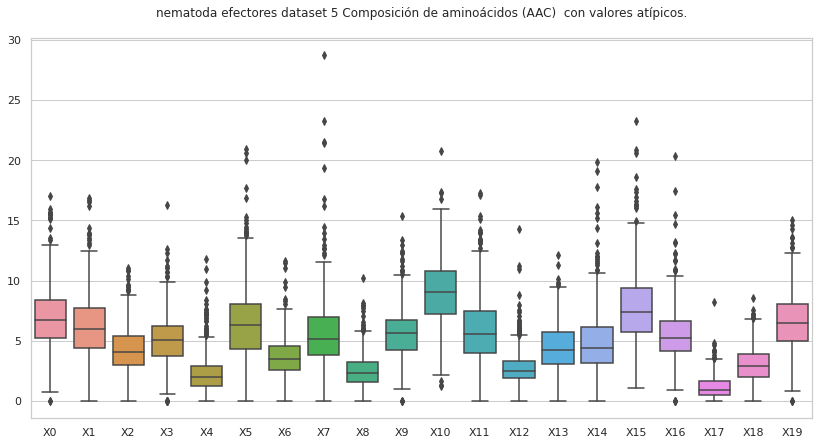

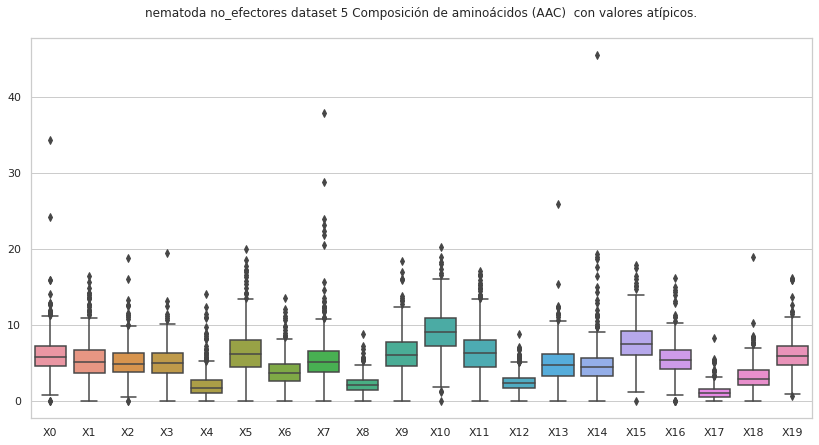

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores nematoda dataset 5, sin valores atípicos.
Valores del documento csv.

        X0      X1      X2     X3     X4      X5     X6     X7     X8     X9  \
0    5.907   2.954   6.118  8.861  0.211  13.502  3.797  4.008  3.586  6.329   
2    6.522   8.696   4.710  4.348  1.449   9.783  3.261  3.261  4.348  3.623   
3    8.224   5.421   3.925  4.299  1.869   6.916  1.869  7.664  1.869  5.794   
5    7.246   4.831   3.382  4.831  2.899  11.111  3.865  4.831  2.899  3.865   
6    4.298  10.602   3.152  3.438  3.725   4.585  3.438  7.736  3.438  4.871   
..     ...     ...     ...    ...    ...     ...    ...    ...    ...    ...   
494  9.524   5.442   2.041  6.122  2.041   3.401  4.082  4.762  3.401  8.163   
495  4.422   5.782   3.061  7.143  2.381   6.803  2.041  5.782  3.741  8.503   
496  6.000   4.857   7.714  6.000  1.714   5.143  2.857  4.571  2.857  5.714   
497  8.475   8.475  10.169  3.390  0.000   5.085  5.085  1.695  1.695  6.780 

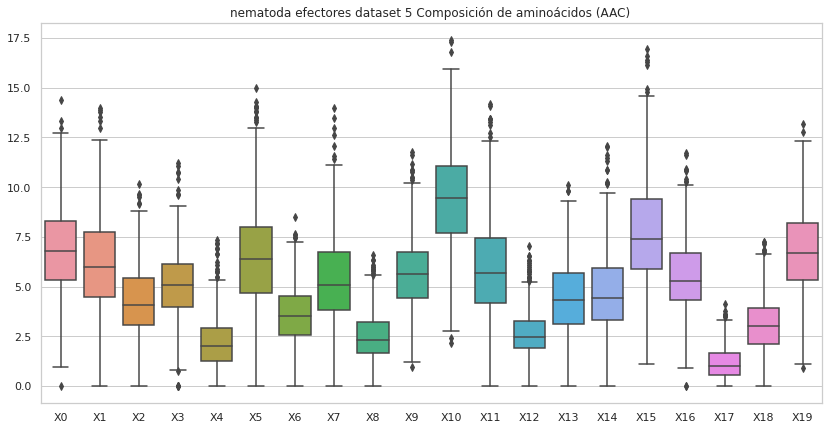

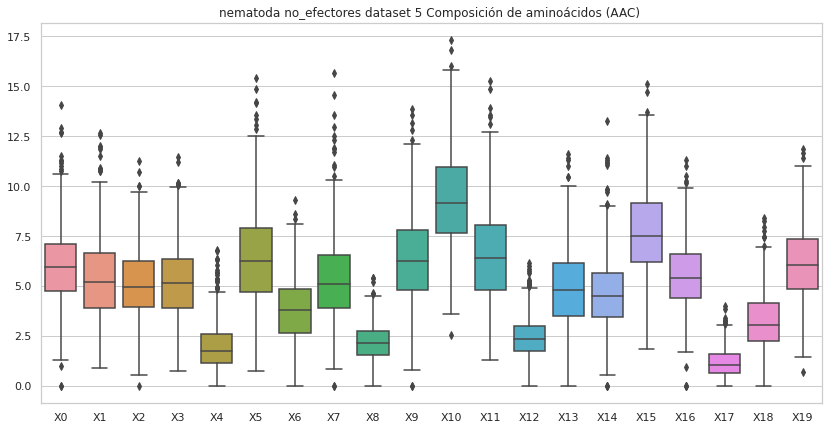

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 5, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.023918  0.000854  0.035877  0.054670  0.011105  0.016230  0.014522   
1    0.020419  0.000000  0.012252  0.008168  0.020419  0.016336  0.004084   
2    0.035114  0.007803  0.023410  0.052671  0.017557  0.017557  0.023410   
3    0.031792  0.007225  0.016618  0.026734  0.018786  0.029624  0.007225   
4    0.020044  0.008018  0.018040  0.026058  0.010022  0.008018  0.008018   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.032721  0.017619  0.052858  0.050340  0.042789  0.042789  0.027687   
496  0.027135  0.007753  0.027135  0.023259  0.021967  0.020675  0.012922   
497  0.142291  0.000000  0.056916  0.085375  0.142291  0.028458  0.028458   
498  0.029687  0.014844  0.034635  0.024739  0.029687  0.044531  0.004948   
499  0.0

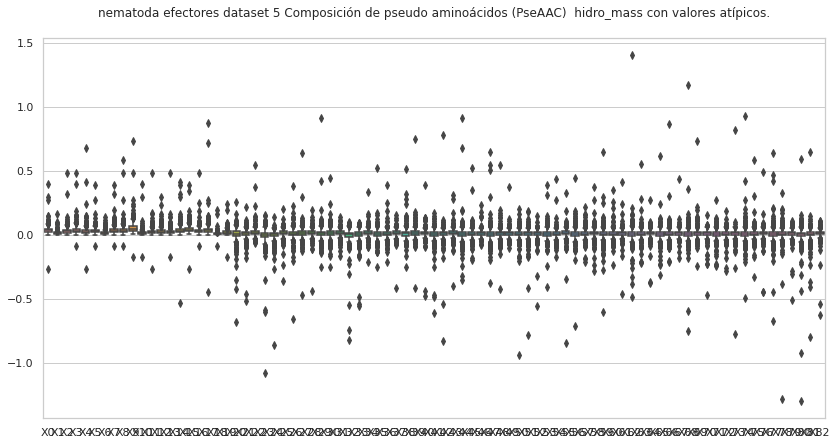

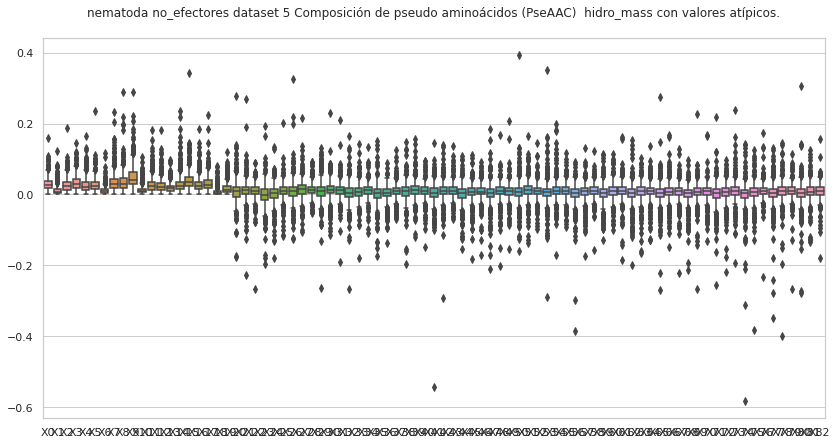

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores nematoda dataset 5, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.023918  0.000854  0.035877  0.054670  0.011105  0.016230  0.014522   
1    0.020419  0.000000  0.012252  0.008168  0.020419  0.016336  0.004084   
2    0.035114  0.007803  0.023410  0.052671  0.017557  0.017557  0.023410   
3    0.031792  0.007225  0.016618  0.026734  0.018786  0.029624  0.007225   
4    0.020044  0.008018  0.018040  0.026058  0.010022  0.008018  0.008018   
..        ...       ...       ...       ...       ...       ...       ...   
493  0.053244  0.015973  0.042595  0.042595  0.042595  0.021298  0.015973   
494  0.064945  0.013917  0.041750  0.023195  0.023195  0.032472  0.023195   
495  0.032721  0.017619  0.052858  0.050340  0.042789  0.042789  0.027687   
496  0.027135  0.007753  0.027135  0.023259  0.021967  0.020675  0.012922   
498  0.0

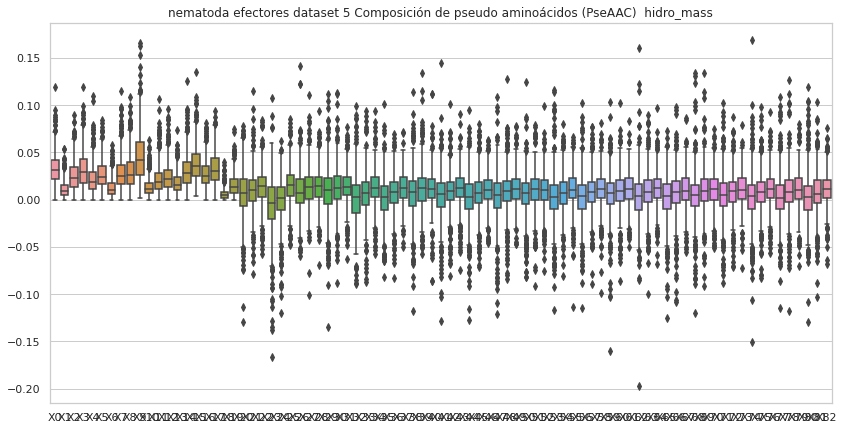

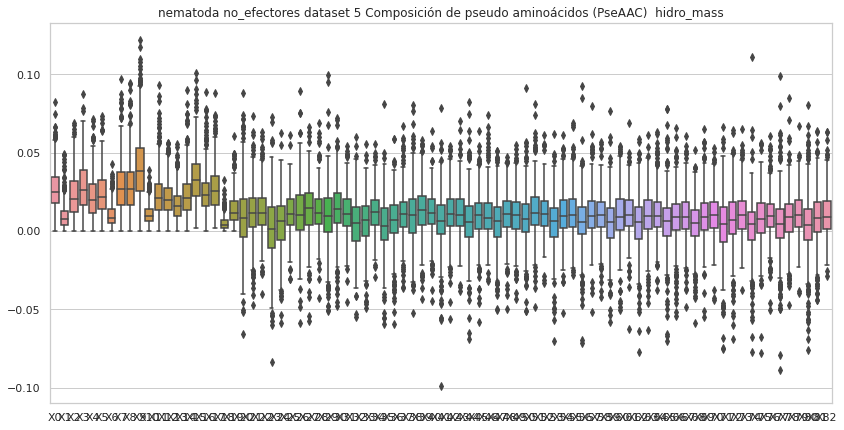

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 5, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.042854  0.001531  0.064281  0.097953  0.019897  0.029080  0.026019   
1    0.043424  0.000000  0.026054  0.017370  0.043424  0.034739  0.008685   
2    0.057470  0.012771  0.038314  0.086206  0.028735  0.028735  0.038314   
3    0.041266  0.009379  0.021571  0.034701  0.024384  0.038452  0.009379   
4    0.058240  0.023296  0.052416  0.075713  0.029120  0.023296  0.023296   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.039465  0.021250  0.063751  0.060715  0.051608  0.051608  0.033393   
496  0.026362  0.007532  0.026362  0.022596  0.021341  0.020085  0.012553   
497  0.082347  0.000000  0.032939  0.049408  0.082347  0.016469  0.016469   
498  0.044417  0.022208  0.051820  0.037014  0.044417  0.066625  0.007403   
499  0.082275 

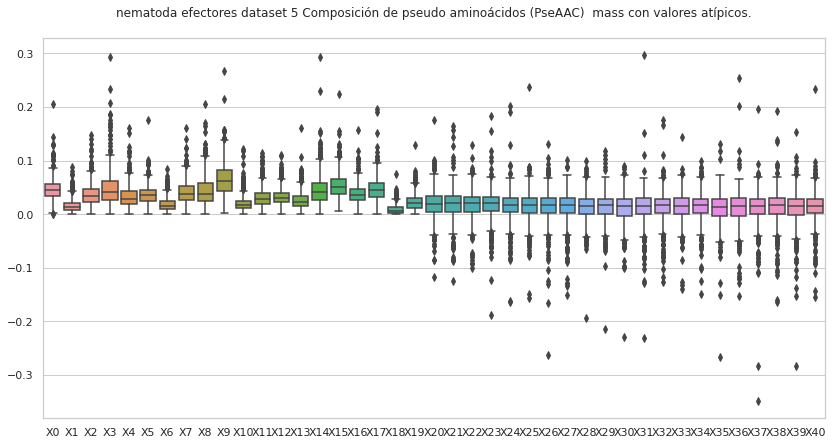

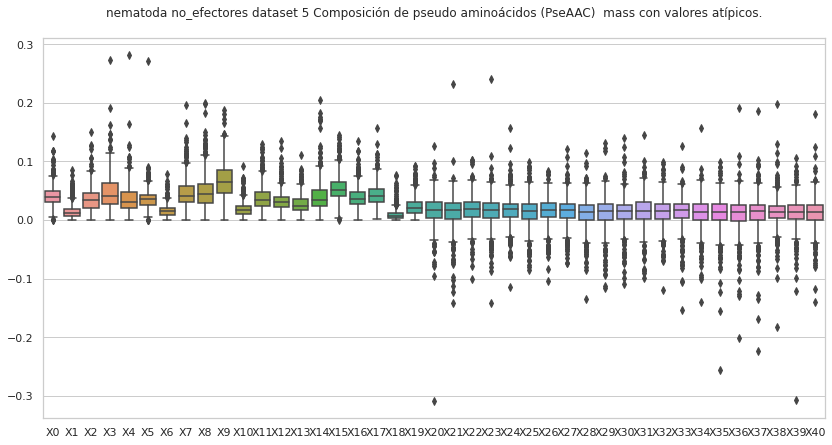

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores nematoda dataset 5, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.042854  0.001531  0.064281  0.097953  0.019897  0.029080  0.026019   
1    0.043424  0.000000  0.026054  0.017370  0.043424  0.034739  0.008685   
2    0.057470  0.012771  0.038314  0.086206  0.028735  0.028735  0.038314   
3    0.041266  0.009379  0.021571  0.034701  0.024384  0.038452  0.009379   
4    0.058240  0.023296  0.052416  0.075713  0.029120  0.023296  0.023296   
..        ...       ...       ...       ...       ...       ...       ...   
492  0.039765  0.012557  0.031393  0.048136  0.023022  0.039765  0.008372   
493  0.058540  0.017562  0.046832  0.046832  0.046832  0.023416  0.017562   
494  0.054556  0.011691  0.035072  0.019484  0.019484  0.027278  0.019484   
495  0.039465  0.021250  0.063751  0.060715  0.051608  0.051608  0.033393   
496  0.026362  0.007532 

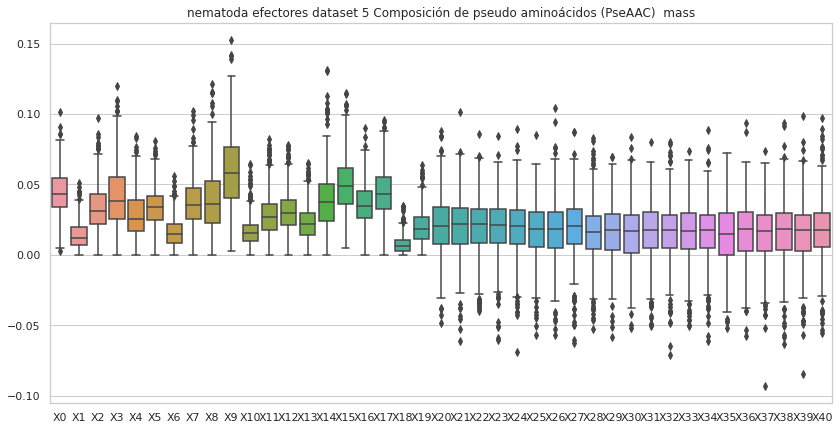

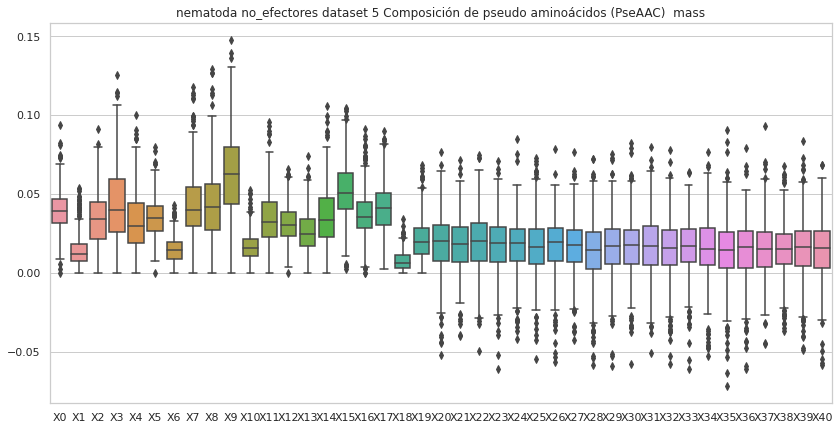

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores nematoda dataset 5, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.028246  0.001009  0.042369  0.064562  0.013114  0.019167  0.017149   
1    0.023616  0.000000  0.014170  0.009446  0.023616  0.018893  0.004723   
2    0.037862  0.008414  0.025242  0.056793  0.018931  0.018931  0.025242   
3    0.051598  0.011727  0.026972  0.043389  0.030490  0.048080  0.011727   
4    0.021969  0.008788  0.019772  0.028560  0.010984  0.008788  0.008788   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.035923  0.019343  0.058029  0.055266  0.046976  0.046976  0.030396   
496  0.064162  0.018332  0.064162  0.054996  0.051940  0.048885  0.030553   
497  0.149609  0.000000  0.059844  0.089766  0.149609  0.029922  0.029922   
498  0.030924  0.015462  0.036078  0.025770  0.030924  0.046386  0.005154   
499  0.091442

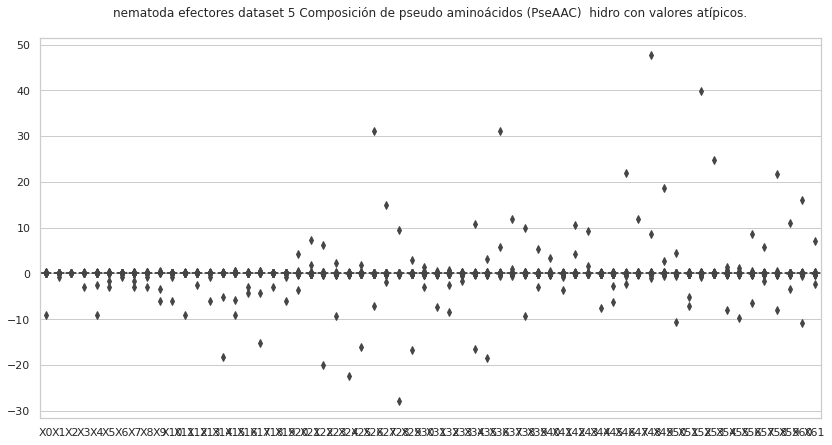

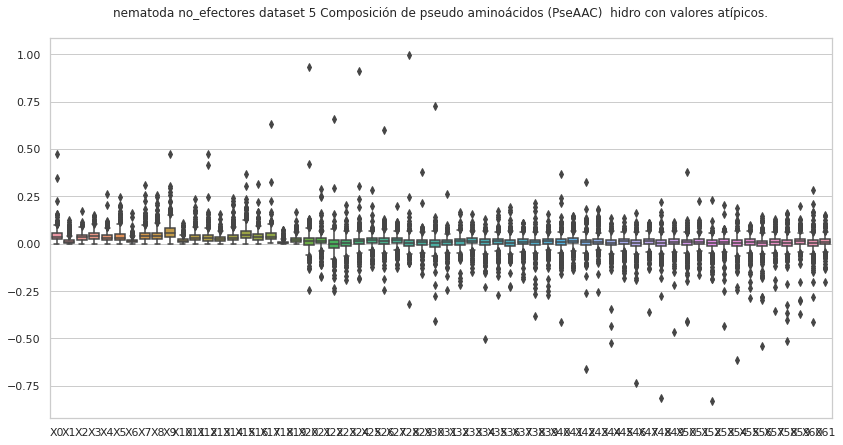

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores nematoda dataset 5, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.028246  0.001009  0.042369  0.064562  0.013114  0.019167  0.017149   
1    0.023616  0.000000  0.014170  0.009446  0.023616  0.018893  0.004723   
2    0.037862  0.008414  0.025242  0.056793  0.018931  0.018931  0.025242   
3    0.051598  0.011727  0.026972  0.043389  0.030490  0.048080  0.011727   
4    0.021969  0.008788  0.019772  0.028560  0.010984  0.008788  0.008788   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.035923  0.019343  0.058029  0.055266  0.046976  0.046976  0.030396   
496  0.064162  0.018332  0.064162  0.054996  0.051940  0.048885  0.030553   
497  0.149609  0.000000  0.059844  0.089766  0.149609  0.029922  0.029922   
498  0.030924  0.015462  0.036078  0.025770  0.030924  0.046386  0.005154   
499  0.091442  0.03

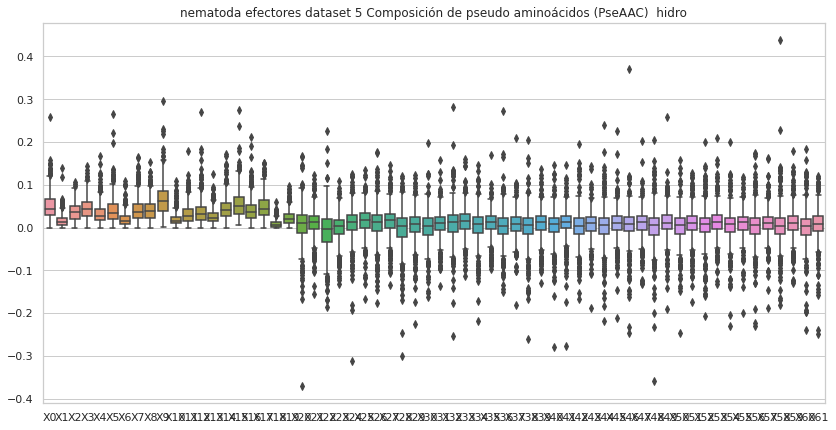

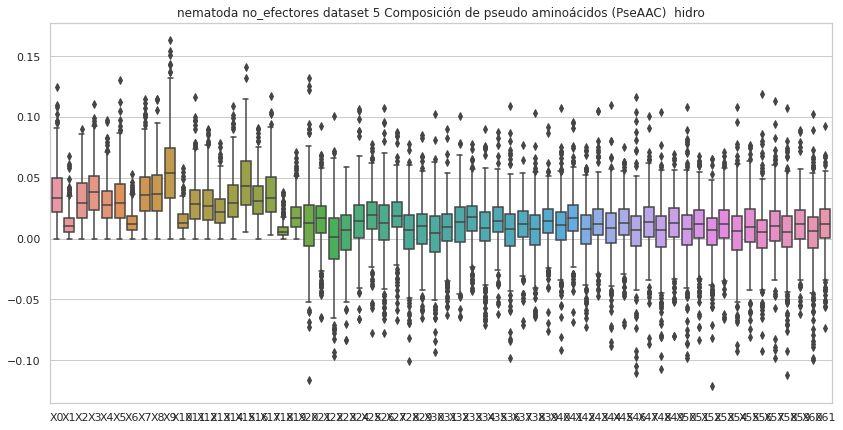

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 5, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.004622  0.021521 -0.007020 -0.002234  0.014137 -0.006020 -0.063299   
1    0.065861  0.099888  0.115225  0.071350 -0.014651 -0.175079  0.083323   
2   -0.011966  0.054191  0.019246 -0.022138  0.053399 -0.059781  0.072857   
3    0.082915  0.026638  0.073253  0.028404  0.004208  0.046544  0.045879   
4   -0.000618 -0.056232 -0.076153  0.077672  0.068254 -0.020627 -0.083698   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.021948  0.032248 -0.010003  0.022332  0.007417  0.007493 -0.037968   
496  0.057319  0.087196  0.100188  0.022304  0.052471  0.064041  0.059096   
497 -0.043424 -0.023200 -0.094913 -0.050880  0.111304  0.026114  0.155105   
498 -0.181910  0.133994 -0.092320 -0.022772  0.033055  0.088942  0.006578   
499 -0.017375 

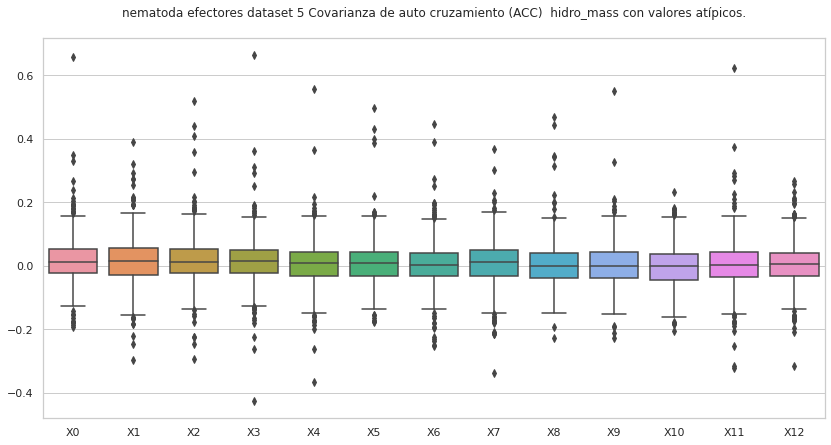

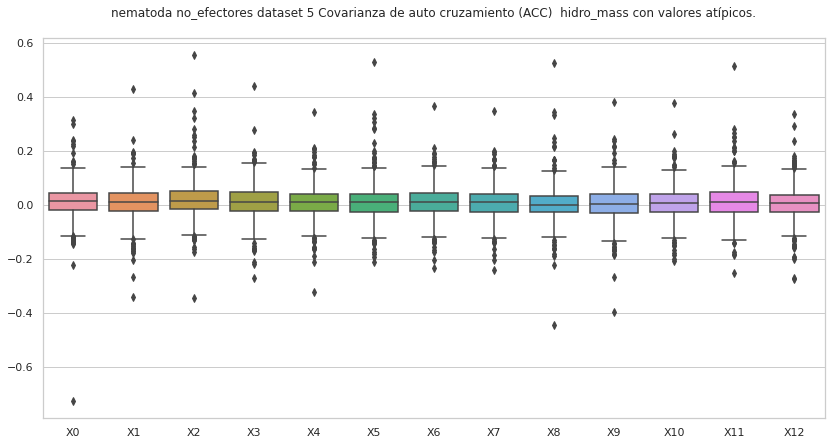

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores nematoda dataset 5, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.004622  0.021521 -0.007020 -0.002234  0.014137 -0.006020 -0.063299   
1    0.065861  0.099888  0.115225  0.071350 -0.014651 -0.175079  0.083323   
2   -0.011966  0.054191  0.019246 -0.022138  0.053399 -0.059781  0.072857   
3    0.082915  0.026638  0.073253  0.028404  0.004208  0.046544  0.045879   
4   -0.000618 -0.056232 -0.076153  0.077672  0.068254 -0.020627 -0.083698   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.021948  0.032248 -0.010003  0.022332  0.007417  0.007493 -0.037968   
496  0.057319  0.087196  0.100188  0.022304  0.052471  0.064041  0.059096   
497 -0.043424 -0.023200 -0.094913 -0.050880  0.111304  0.026114  0.155105   
498 -0.181910  0.133994 -0.092320 -0.022772  0.033055  0.088942  0.006578   
499 -0.017375 

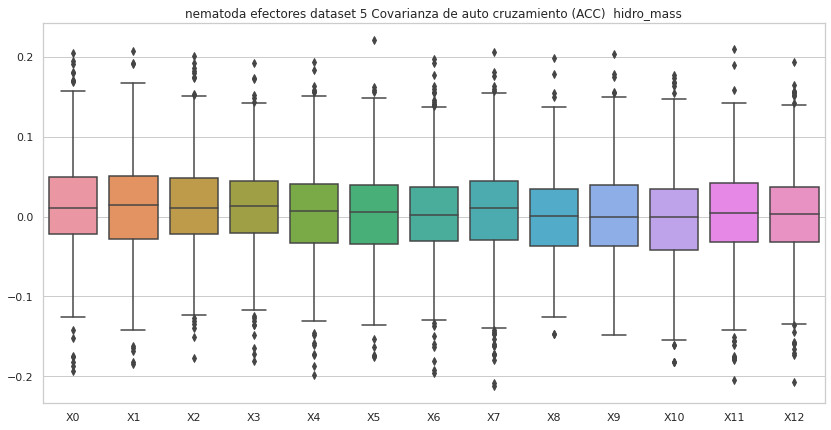

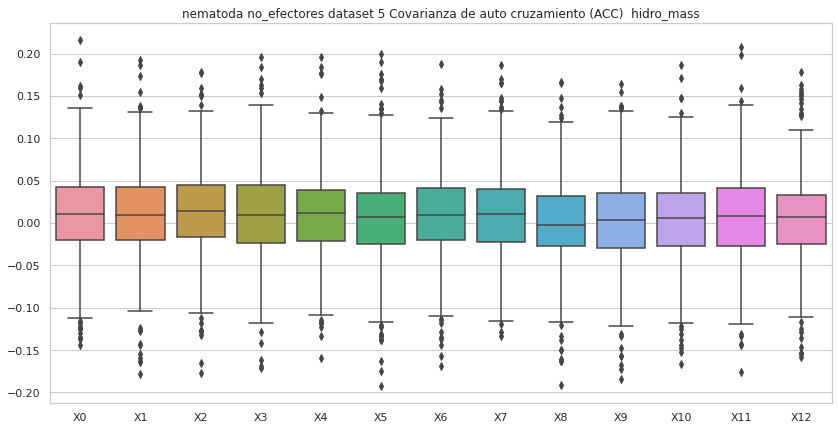

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 5, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.004622  0.021521 -0.007020 -0.002234  0.014137 -0.006020 -0.063299   
1    0.065861  0.099888  0.115225  0.071350 -0.014651 -0.175079  0.083323   
2   -0.011966  0.054191  0.019246 -0.022138  0.053399 -0.059781  0.072857   
3    0.082915  0.026638  0.073253  0.028404  0.004208  0.046544  0.045879   
4   -0.000618 -0.056232 -0.076153  0.077672  0.068254 -0.020627 -0.083698   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.021948  0.032248 -0.010003  0.022332  0.007417  0.007493 -0.037968   
496  0.057319  0.087196  0.100188  0.022304  0.052471  0.064041  0.059096   
497 -0.043424 -0.023200 -0.094913 -0.050880  0.111304  0.026114  0.155105   
498 -0.181910  0.133994 -0.092320 -0.022772  0.033055  0.088942  0.006578   
499 -0.017375 -0.016

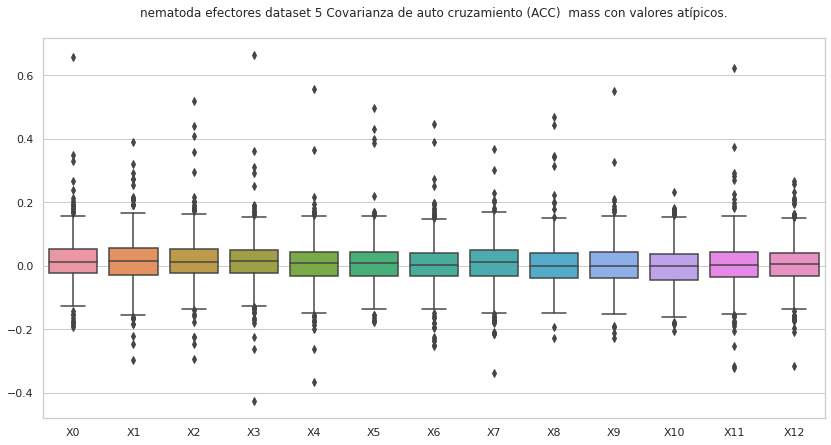

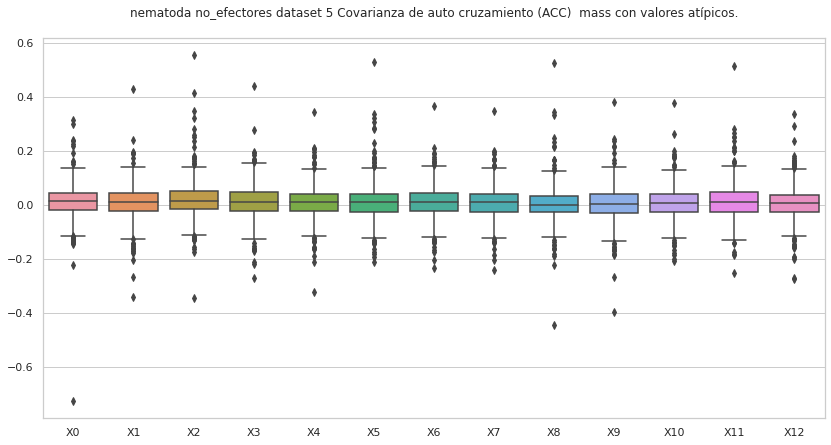

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores nematoda dataset 5, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0   -0.004622  0.021521 -0.007020 -0.002234  0.014137 -0.006020 -0.063299   
1    0.065861  0.099888  0.115225  0.071350 -0.014651 -0.175079  0.083323   
2   -0.011966  0.054191  0.019246 -0.022138  0.053399 -0.059781  0.072857   
3    0.082915  0.026638  0.073253  0.028404  0.004208  0.046544  0.045879   
4   -0.000618 -0.056232 -0.076153  0.077672  0.068254 -0.020627 -0.083698   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.021948  0.032248 -0.010003  0.022332  0.007417  0.007493 -0.037968   
496  0.057319  0.087196  0.100188  0.022304  0.052471  0.064041  0.059096   
497 -0.043424 -0.023200 -0.094913 -0.050880  0.111304  0.026114  0.155105   
498 -0.181910  0.133994 -0.092320 -0.022772  0.033055  0.088942  0.006578   
499 -0.017375 -0.016556 -0.021

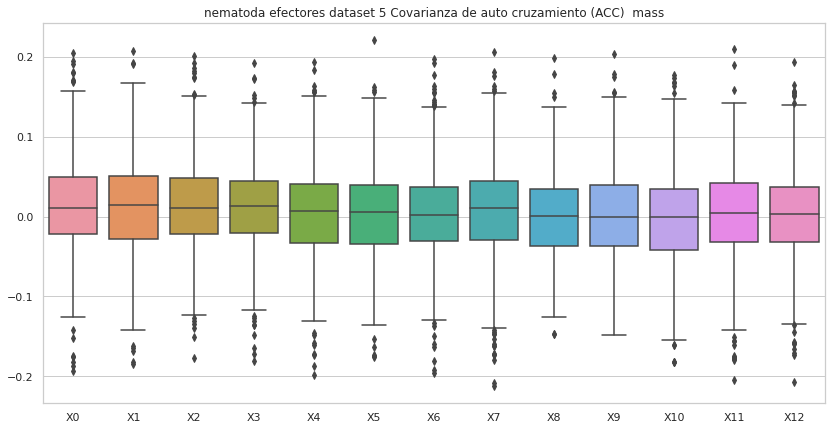

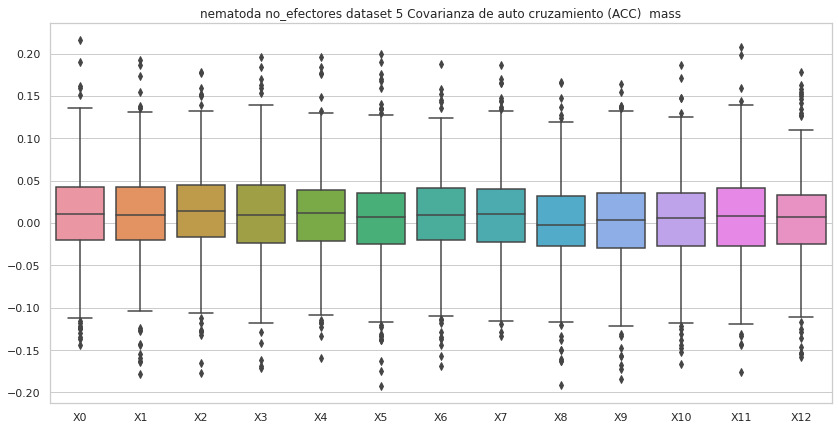

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores nematoda dataset 5, con valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.065449 -0.181147 -0.076902  0.054192 -0.016721  0.012068  0.047374   
1    0.062272 -0.296558  0.080816  0.219622  0.074763 -0.104301  0.003782   
2    0.001888 -0.031313 -0.060426 -0.000681 -0.017064 -0.110276 -0.060509   
3    0.046185 -0.028828  0.024607  0.016371 -0.034182  0.029293  0.102199   
4    0.168342  0.066908  0.061463 -0.125254 -0.026610 -0.215291  0.143828   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.038636  0.018320 -0.016168 -0.045454  0.035099  0.042829  0.006529   
496 -0.018126 -0.001221 -0.094503 -0.026380  0.004365  0.072932 -0.067343   
497 -0.176960  0.060679  0.102384  0.098178  0.071239 -0.047339  0.102444   
498  0.020969  0.077289 -0.003677 -0.020676  0.025965  0.009992  0.047705   
499  0.001033 -0.17

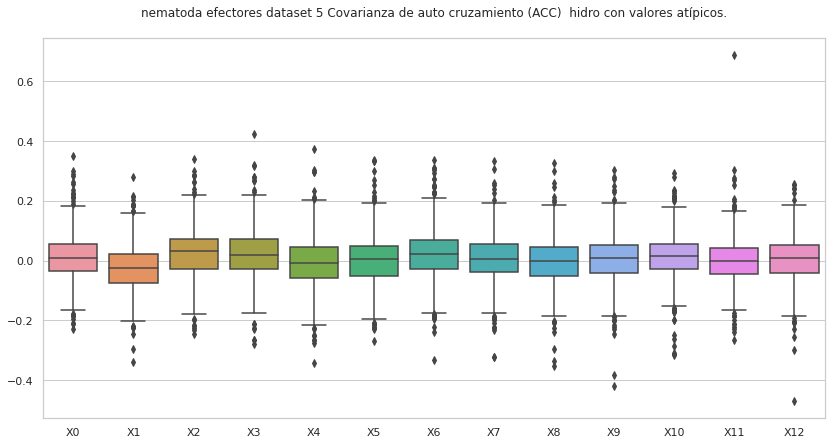

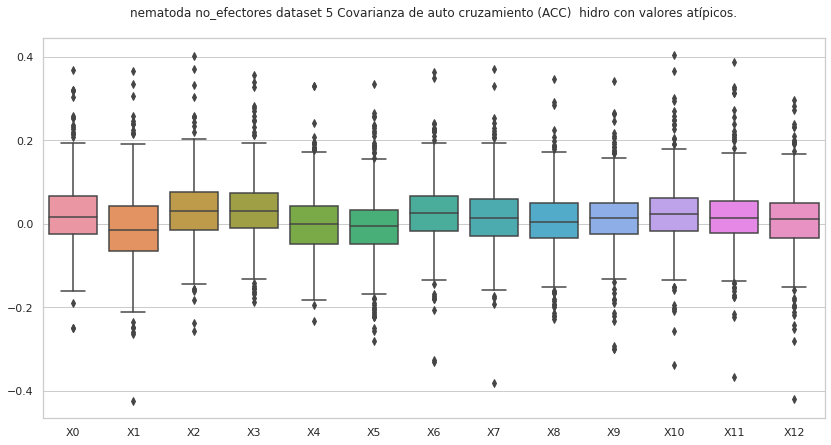

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores nematoda dataset 5, sin valores atípicos.
Valores del documento csv.

           X0        X1        X2        X3        X4        X5        X6  \
0    0.065449 -0.181147 -0.076902  0.054192 -0.016721  0.012068  0.047374   
2    0.001888 -0.031313 -0.060426 -0.000681 -0.017064 -0.110276 -0.060509   
3    0.046185 -0.028828  0.024607  0.016371 -0.034182  0.029293  0.102199   
4    0.168342  0.066908  0.061463 -0.125254 -0.026610 -0.215291  0.143828   
5   -0.076580 -0.068564  0.186762 -0.000599 -0.074997  0.094595 -0.098404   
..        ...       ...       ...       ...       ...       ...       ...   
494 -0.150077 -0.135383  0.110230 -0.010398 -0.023000 -0.056699  0.046604   
495 -0.038636  0.018320 -0.016168 -0.045454  0.035099  0.042829  0.006529   
496 -0.018126 -0.001221 -0.094503 -0.026380  0.004365  0.072932 -0.067343   
498  0.020969  0.077289 -0.003677 -0.020676  0.025965  0.009992  0.047705   
499  0.001033 -0.177276  

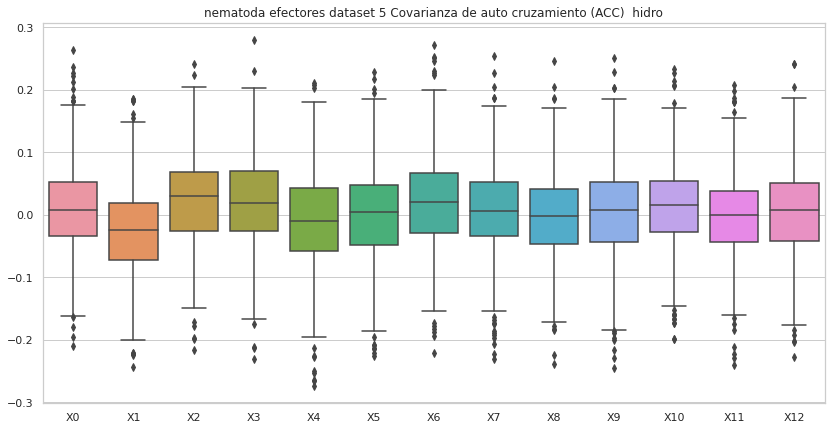

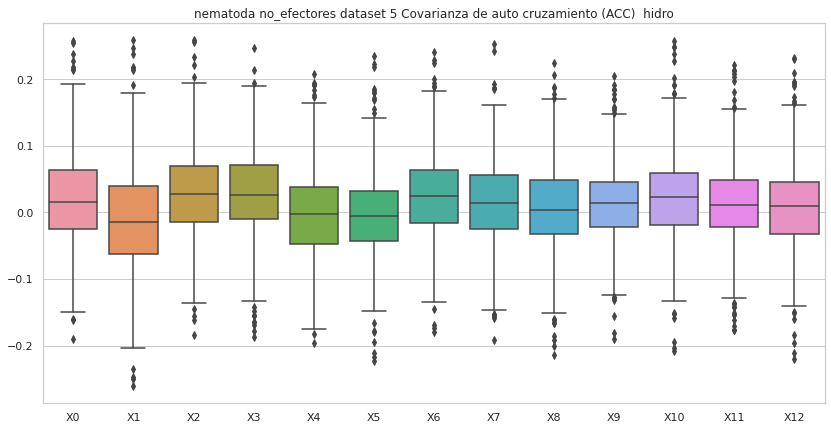

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))